In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl ##
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt -qq -y install fonts-nanum
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=font_path, size=14).get_name()
print(font)
plt.rc("font", family=font)
fm._rebuild()
mpl.rcParams["axes.unicode_minus"]

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
NanumBarunGothic


In [ ]:
# !pip install konlpy
import konlpy
from konlpy.tag import Okt

from collections import Counter

import gensim
from gensim.models import CoherenceModel
from gensim import corpora

from pprint import pprint
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 11.5 MB/s 
     |████████████████████████████████| 453 kB 48.3 MB/s 


In [ ]:
df = pd.read_excel("방탄소년단_노래크롤링_수정본.xlsx", sheet_name="Sheet1")
df.head()

,번호,title,artist,album,date,genre,flac,lyric
0,1,좋아요,방탄소년단,2 COOL 4 SKOOL,2013.06.12,발라드,Flac 16bit,Wanna be loved\nDon't wanna be fool wanna\nbe ...
1,2,No More Dream,방탄소년단,2 COOL 4 SKOOL,2013.06.12,랩/힙합,Flac 16bit,얌마 니 꿈은 뭐니\n얌마 니 꿈은 뭐니\n얌마 니 꿈은 뭐니\n니 꿈은 겨우 그거...
2,3,We Are Bulletproof PT.2,방탄소년단,2 COOL 4 SKOOL,2013.06.12,랩/힙합,Flac 16bit,What 이리 내놔\nWhat 긴장해 다\nWhat 끝판대장\nWhat We are...
3,4,Outro : Circle Room Cypher,방탄소년단,2 COOL 4 SKOOL,2013.06.12,랩/힙합,Flac 16bit,내 이름은 SUGA\n다른 래퍼들은 전부 내 뒤에\n오늘도 쌔끈한 이 비트 위에\n...
4,5,Intro : 2 COOL 4 SKOOL (Feat. DJ Friz),방탄소년단,2 COOL 4 SKOOL,2013.06.12,랩/힙합,Flac 16bit,We're now going to progress\nto some steps whi...


#형태소 분석

In [ ]:
#형태소 분리
tagger = Okt()
lyrics = df.get("lyric")

morphs_lr = []
morphs_total = []
for lyric in lyrics:
  lr_list = []
  for li in  tagger.morphs(lyric):
    if li == "\n":
      pass
    elif li == "\n\n":
      pass
    elif len(li) <= 1:
      pass
    else:
      lr_list.append(li)  
    
  #print(lr_list)

  morphs_lr.append(lr_list)
  morphs_total.extend(lr_list)


#단어별 빈도 추출
d = Counter(morphs_total)
counter_df = pd.DataFrame.from_dict(d, orient="index").reset_index()
counter_df.rename(columns={"index": "word", 0:"freq"}, inplace=True)
counter_df = counter_df.sort_values("freq", ascending=False)
counter_df.head()

,word,freq
152,you,475
237,me,379
12,it,351
371,my,329
247,la,283


In [ ]:
counter_df.to_excel("/content/sample_data/1글자제거.xlsx", index=False)

In [ ]:
#트라이그램 변환
import nltk
from nltk.util import ngrams
from nltk import ConditionalFreqDist

#명사분석

In [ ]:
tagger = Okt() #분석기

#가사
posts = df.get("lyric")

nouns = [] #노래별 명사
nouns_total = [] #모든노래 명사
for post in posts:
  post_nouns = []
  for noun in tagger.nouns(post):
    if len(noun) > 1:
      post_nouns.append(noun)
  nouns.append(post_nouns)

for n in nouns:
  nouns_total.extend(n)

In [ ]:
#단어별 빈도 추출: nouns_total
d = Counter(nouns_total)
counter_df = pd.DataFrame.from_dict(d, orient="index").reset_index()
counter_df.rename(columns = {"index": "nouns", 0: "freq"}, inplace=True)
counter_df = counter_df.sort_values("freq", ascending=False)
counter_df

,nouns,freq
159,우리,142
609,사랑,120
140,우린,102
62,지금,89
110,다시,89
...,...,...
1192,듣보잡,1
1191,건방,1
1190,패기,1
1189,뺑끼,1


In [ ]:
counter_df.to_excel("220728_국문가사_빈도분석.xlsx")

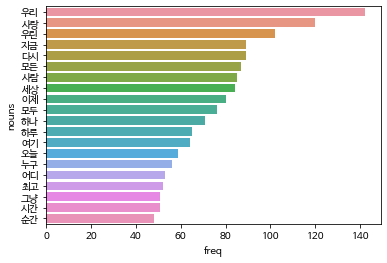

In [ ]:
sns.barplot(data=counter_df[:20], x="freq", y="nouns")##